# Challenge: What test to use
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Who reported watching more TV in 2012, men or women?
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import json
from time import time
from collections import Counter
from sklearn import ensemble
from sklearn.metrics import accuracy_score, classification_report, log_loss, make_scorer, normalized_mutual_info_score, adjusted_rand_score, homogeneity_score, silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [10]:
df.shape

(8594, 13)

In [11]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [13]:
df['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [14]:
countries = df.cntry.unique().tolist()

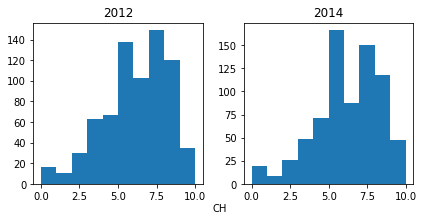

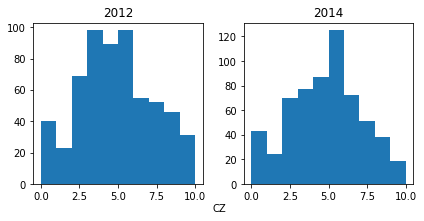

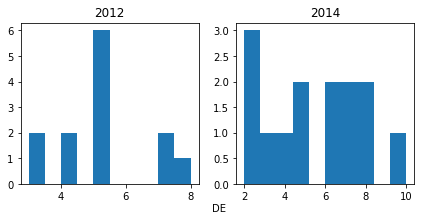

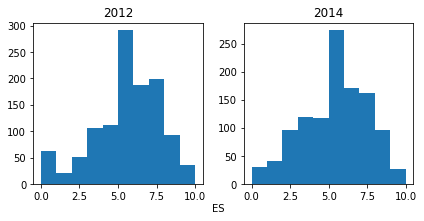

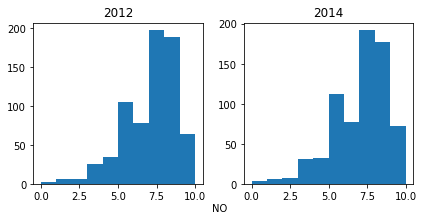

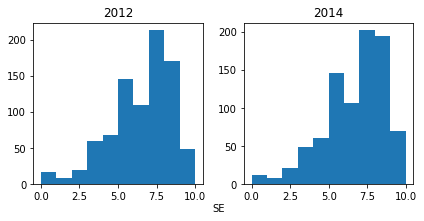

In [15]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()